## Medical Cost Insurance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
insurance_df = pd.read_csv("medical_cost_insurance.csv")

In [6]:
print(insurance_df.head())
print(insurance_df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


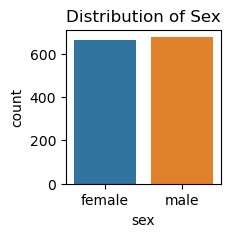

In [7]:
plt.figure(figsize=(2, 2))
sns.countplot(x='sex', data=insurance_df)
plt.title('Distribution of Sex')
plt.show()

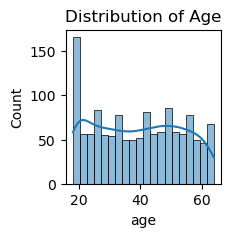

In [8]:
plt.figure(figsize=(2, 2))
sns.histplot(insurance_df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

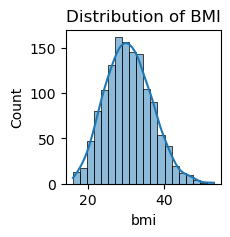

In [9]:
plt.figure(figsize=(2, 2))
sns.histplot(insurance_df['bmi'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.show()

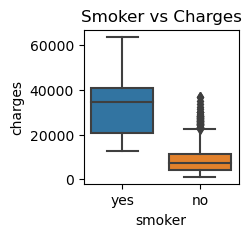

In [10]:
plt.figure(figsize=(2, 2))
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Smoker vs Charges')
plt.show()

In [11]:
X = insurance_df.drop(columns=['charges'])
y = insurance_df['charges']

In [12]:
cat_cols = ['sex', 'smoker', 'region']
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
num_cols = ['age', 'bmi']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [15]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error: 2543.56
Mean Squared Error: 20889249.71
Root Mean Squared Error: 4570.48
R^2 Score: 0.8654
